Import neccessary libraries
Load dataset into a DataFrame named data

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

data=pd.read_csv("preprocessed_data.csv")
data

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,0.505353,0.545455,0.200000,0.000000,0.000000,1.0,1.0,0.506735,1
1,0.481799,0.522727,0.100000,0.334031,0.000000,0.0,1.0,0.562709,0
2,0.254818,0.545455,0.800000,0.636357,0.800000,1.0,0.0,0.569654,1
3,0.676660,0.477273,0.100000,0.000000,0.400000,0.0,0.0,0.469120,0
4,1.000000,0.568182,0.200000,0.500246,0.000000,1.0,1.0,0.395400,0
...,...,...,...,...,...,...,...,...,...
15921,0.796021,0.635139,0.294613,0.444239,0.800000,1.0,0.0,0.800099,1
15922,0.141680,0.920881,0.690375,0.499893,0.000000,1.0,0.0,0.252670,1
15923,0.573911,0.332799,0.258921,0.482150,0.000000,0.0,1.0,0.826455,1
15924,0.611469,0.556419,0.162646,0.000000,0.874707,1.0,0.0,0.375351,1


Defines a function eval_model_with_grid_search to evaluate a model using GridSearchCV.
It performs a grid search over specified parameter values and displays the results including the best parameters and score.

In [8]:
# Split data into features (X) and target variable (y)
x = data.drop(columns='churn')
y = data['churn']

# Function to evaluate a model using GridSearchCV
def eval_model_with_grid_search(model, X, Y, param_grid):
    # GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=5, return_train_score=False)
    grid_search.fit(X, Y)

    print("Grid search cv result table\n\n")

    # Display the grid search results
    df = pd.DataFrame(grid_search.cv_results_)
    print(df)

    print("Filtered score table \n\n")

    # Display filtered table with relevant columns
    filtered_table = df[['param_estimator__metric','param_estimator__weights','param_estimator__n_neighbors','mean_test_score']]
    print(filtered_table)

    # Display the best parameters and best score found by GridSearchCV
    print("\n\nBest Parameters : ", grid_search.best_params_)
    print("\n\nBest Score : ",grid_search.best_score_)

    return grid_search

# Define the parameter grid for GridSearchCV
param_grid = {
    'estimator__n_neighbors': [1, 3, 5, 7, 9],  # Try different values for n_neighbors
    'estimator__weights': ['uniform', 'distance'],  # Try different weight options
    'estimator__metric': ['euclidean', 'manhattan', 'chebyshev']  # Try different distance metrics
}


KNeighborsClassifier and BaggingClassifier are created.
Data is split into training and testing sets, and features are standardized.
The eval_model_with_grid_search function is called to evaluate the BaggingClassifier using GridSearchCV, and predictions are made on the test set.

In [9]:
# Create KNeighborsClassifier
knn = KNeighborsClassifier()

# Create BaggingClassifier with KNeighborsClassifier as base estimator
bagging_knn = BaggingClassifier(estimator=knn, max_samples=0.9, max_features=0.9)

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.20)

# Standardize features by removing the mean and scaling to unit variance
sc = StandardScaler()
x_train_rescaled = sc.fit_transform(x_train)
x_test_rescaled = sc.transform(x_test)

# Evaluate model with GridSearchCV
evaluated_model = eval_model_with_grid_search(bagging_knn, x_train_rescaled, y_train, param_grid)

# Predict target variable on the test set
y_pred = evaluated_model.predict(x_test_rescaled)


Grid search cv result table


    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.117626      0.008645         0.273441        0.007765   
1        0.105165      0.002409         0.255569        0.006995   
2        0.108020      0.005555         0.369868        0.020107   
3        0.108049      0.003227         0.375807        0.016534   
4        0.111900      0.011904         0.460294        0.021863   
5        0.107242      0.004098         0.448620        0.010209   
6        0.105865      0.003827         0.507928        0.017838   
7        0.108233      0.003127         0.520589        0.012022   
8        0.106820      0.004085         0.560165        0.019082   
9        0.121800      0.009723         0.615276        0.014022   
10       0.143525      0.013627         0.384473        0.063262   
11       0.136384      0.014320         0.349504        0.041299   
12       0.120490      0.014213         0.451552        0.019145   
13       0.120205 

Finally, the confusion matrix, classification report, and testing accuracy are calculated and displayed. 



Confusion Matrix 



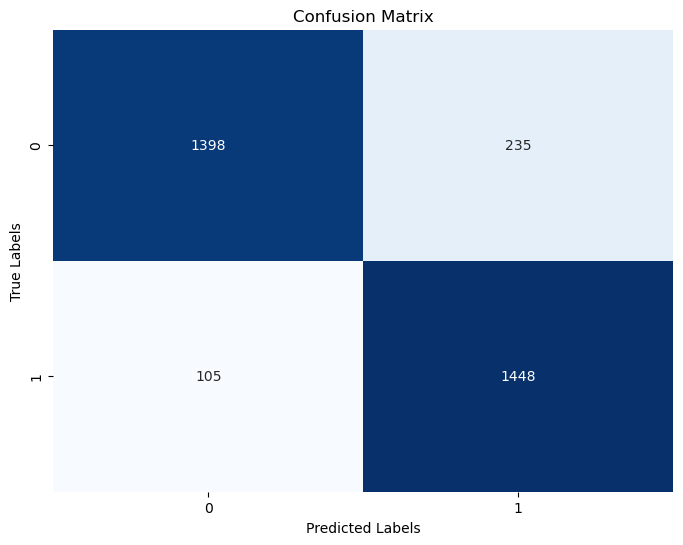




Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.89      1633
           1       0.86      0.93      0.89      1553

    accuracy                           0.89      3186
   macro avg       0.90      0.89      0.89      3186
weighted avg       0.90      0.89      0.89      3186



Testing Accuracy :  0.8932831136220967


In [10]:
# Confusion matrix
print("\n\nConfusion Matrix \n")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("\n\n\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the testing accuracy
accuracy = accuracy_score(y_test, y_pred)
print ("\n\nTesting Accuracy : ",accuracy)